# Tips Data EDA

In [1]:
%matplotlib inline
import numpy as np
import math
import matplotlib.pyplot as plt
import pandas as pd
import datetime

import seaborn as sns
sns.set_style('whitegrid')
sns.set_context("poster")

In [75]:
from textblob import TextBlob

In [2]:
def time_marker(text=''):
    print('[{}] {}'.format(datetime.datetime.now().time(), text.title()))

In [4]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))

import matplotlib
font = {'size' : 50}
matplotlib.rc('font', **font)

TITLE_FONT_SIZE = 25
LABEL_FONT_SIZE = 15
TICK_FONT_SIZE  = 15

day_labels = ['MON','TUE','WED','THU','FRI','SAT','SUN']
day_labels_full = ['MONDAY','TUESDAY','WEDNESDAY','THURSDAY','FRIDAY','SATURDAY','SUNDAY']
month_labels = ['JAN','FEB','MAR','APR','MAY','JUN','JUL','AUG','SEP','OCT','NOV','DEC']
month_labels_full = ['JANUARY','FEBRUARY','MARCH','APRIL','MAY','JUNE','JULY','AUGUST','SEPTEMBER','OCTOBER','NOVEMBER','DECEMBER']

FIG_SIZE = (15,6)
FIG_SIZE_SHORT = (15,3)
GRID_DIMS = 15

DO_WRITE_CHARTS = False

# Load Tips Dataset

In [95]:
time_marker(text='Loading Tips Data...')

tips = pd.DataFrame()
datafile = '../clean_data/tips_clean.csv'

# Chunk Settings
chunks = list()
chunksize = 10000
num_chunks = math.ceil(sum(1 for row in open(datafile, 'r'))/chunksize)
format_width = len(str(num_chunks))

# import file in chunks
for ii, chunk in enumerate(pd.read_csv(datafile, chunksize=chunksize, iterator=True, index_col=0, parse_dates=['date'])):
        
    # append chunk to chunks list
    chunks.append(chunk)
    if ii == 1 or ii % math.ceil(num_chunks/10) == 0 or ii == num_chunks:
        time_marker(text='\tfinished chunk {} of {}'.format(str(ii).rjust(format_width), str(num_chunks).rjust(format_width)))

time_marker(text='merging to dataframe...')
tips = pd.concat(chunks)
tips.reset_index(inplace=True, drop=True)
time_marker(text='Complete!')


[22:19:47.020905] Loading Tips Data...
[22:19:47.813759] 	Finished Chunk   0 Of 107
[22:19:47.854506] 	Finished Chunk   1 Of 107
[22:19:48.292552] 	Finished Chunk  11 Of 107
[22:19:48.822682] 	Finished Chunk  22 Of 107
[22:19:49.296715] 	Finished Chunk  33 Of 107
[22:19:50.131846] 	Finished Chunk  44 Of 107
[22:19:50.779504] 	Finished Chunk  55 Of 107
[22:19:51.301407] 	Finished Chunk  66 Of 107
[22:19:51.789613] 	Finished Chunk  77 Of 107
[22:19:52.286872] 	Finished Chunk  88 Of 107
[22:19:52.825534] 	Finished Chunk  99 Of 107
[22:19:52.955057] Merging To Dataframe...
[22:19:53.296670] Complete!


In [96]:
tips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1028802 entries, 0 to 1028801
Data columns (total 6 columns):
business_id    1028802 non-null object
date           1028802 non-null datetime64[ns]
likes          1028802 non-null int64
text           1028801 non-null object
user_id        1028802 non-null object
tip_len        1028802 non-null int64
dtypes: datetime64[ns](1), int64(2), object(3)
memory usage: 47.1+ MB


In [97]:
print('{} total reviews'.format(tips.shape[0]))
for col in sorted(tips.columns):
    print('{} contains {} unique entries'.format(str(col).ljust(15), str(len(tips[col].unique())).rjust(7)))

1028802 total reviews
business_id     contains  104412 unique entries
date            contains    3004 unique entries
likes           contains      13 unique entries
text            contains  968489 unique entries
tip_len         contains     500 unique entries
user_id         contains  244632 unique entries


In [109]:
def get_sentiment(df=None):

    df['polarity'] = np.nan
    df['subjectivity'] = np.nan
    df['polarity'] = df['text'].apply(lambda text: list(TextBlob(text).sentiment)[0])
    df['subjectivity'] = df['text'].apply(lambda text: list(TextBlob(text).sentiment)[1])
    
    return df

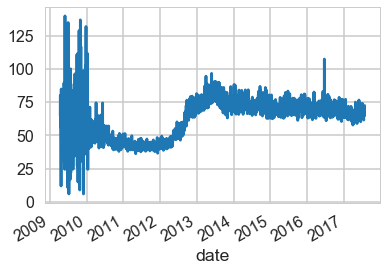

In [106]:
tips.groupby('date').tip_len.mean().plot()
plt.show()
plt.close()

In [ ]:
tips = get_sentiment(df=tips)
tips.head()

In [ ]:
tips.text